## TELSTRA NETWORK DISTURBTION PREIDITION:

In [80]:
#Import basic libraries:
import pandas as pd
import numpy as np
import datetime as dt

pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Working with "TRAIN & TEST" data sets:

# Data sets provided:
1. train.csv
2. test.csv

3. seviarity_type.csv
4. resource_type.csv
5. log_features.csv
6. event_type.csv

7. sample_submission.csv

In [81]:
#Import train & test data:
train = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')
print('train', train.shape, 'test', test.shape)

train (7381, 3) test (11171, 2)


In [82]:
test['fault_severity'] = -1
test.head()

,id,location,fault_severity
0,11066,location 481,-1
1,18000,location 962,-1
2,16964,location 491,-1
3,4795,location 532,-1
4,3392,location 600,-1


In [83]:
features = train.append(test)


/var/folders/5s/jcx1bbbj423bxf9z2l296d800000gn/T/ipykernel_4461/2777474116.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  features = train.append(test)


In [84]:
features.insert(2, 'location_id', features.location.apply(lambda x: int(x.split('location' )[1])))
features

,id,location,location_id,fault_severity
0,14121,location 118,118,1
1,9320,location 91,91,0
2,14394,location 152,152,1
3,8218,location 931,931,1
4,14804,location 120,120,0
...,...,...,...,...
11166,14806,location 1073,1073,-1
11167,1825,location 11,11,-1
11168,2374,location 917,917,-1
11169,7277,location 208,208,-1


In [85]:
features.drop('location', axis=1, inplace=True)
features

,id,location_id,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0
...,...,...,...
11166,14806,1073,-1
11167,1825,11,-1
11168,2374,917,-1
11169,7277,208,-1


## Working with "Severity_type.csv" data sets:

In [86]:
#Import data:
svrty = pd.read_csv('./data/severity_type.csv')
svrty

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1
...,...,...
18547,3761,severity_type 1
18548,8720,severity_type 1
18549,6488,severity_type 2
18550,878,severity_type 2


In [87]:
svrty.id.unique()

array([6597, 8011, 2597, ..., 6488,  878, 4464])

In [88]:


svrty_order = svrty[['id']]

svrty_order['order'] = 1. * np.arange(len(svrty_order))/len(svrty_order)
svrty_order

,id,order
0,6597,0.000000
1,8011,0.000054
2,2597,0.000108
3,5022,0.000162
4,6852,0.000216
...,...,...
18547,3761,0.999730
18548,8720,0.999784
18549,6488,0.999838
18550,878,0.999892


### Merged feature above date with updated svrty_order data:

In [89]:
features = pd.merge(features, svrty_order, how='inner', on='id')
features = features[['id', 'location_id', 'order', 'fault_severity']]
features

,id,location_id,order,fault_severity
0,14121,118,0.170009,1
1,9320,91,0.912947,0
2,14394,152,0.231458,1
3,8218,931,0.932514,1
4,14804,120,0.177285,0
...,...,...,...,...
18547,14806,1073,0.106404,-1
18548,1825,11,0.134649,-1
18549,2374,917,0.917367,-1
18550,7277,208,0.268273,-1


In [90]:
(features.location_id == 2).sum()

22

In [91]:
# Location Count:
location_count = features.groupby('location_id').count()[['id']]
location_count.columns = ['location_count']
location_count

,location_count
location_id,
1,69
2,22
3,4
4,9
5,1
...,...
1122,2
1123,1
1124,1


In [92]:
#Merge location count into main features as a coulumn:
features = pd.merge(features, location_count, how='inner', left_on='location_id', right_index=True)

#temp = features.pop('location_count')
#features.insert(2, 'location_count', temp)

features

,id,location_id,location_count,order,fault_severity
0,14121,118,97,0.170009,1
94,6821,118,97,0.171734,0
103,12008,118,97,0.171087,0
228,18441,118,97,0.169254,0
897,9479,118,97,0.171572,0
...,...,...,...,...,...
18190,16651,178,1,0.254097,-1
18231,5810,383,1,0.377587,-1
18266,8952,581,1,0.546464,-1
18295,312,728,1,0.679226,-1


In [93]:
#check for other locations
features[features.location_id==110]

,id,location_id,location_count,order,fault_severity
2239,12568,110,9,0.134810,0
8748,4695,110,9,0.134702,-1
11972,15792,110,9,0.135134,-1
12249,15561,110,9,0.134864,-1
12665,7810,110,9,0.134756,-1
14304,5033,110,9,0.134918,-1
15875,17602,110,9,0.134972,-1
16201,8560,110,9,0.135080,-1
16468,17872,110,9,0.135026,-1


In [94]:
# ---------------------------------------------------------------------------------
# binarize frequent locations
# ---------------------------------------------------------------------------------
MIN_FREQ=20
frequent_locations = location_count[location_count['location_count'] > MIN_FREQ]
frequent_location_records = features[features['location_id'].isin(frequent_locations.index)].copy()
frequent_location_records['value'] = 1
location_features = frequent_location_records.pivot(index='id', columns='location_id', values='value')
location_features.columns = ['location_%i' % c for c in location_features.columns]
print ('location_features', location_features.shape)

location_features (13331, 247)


In [95]:
location_features.head()

,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [96]:
features = pd.merge(features, location_features, how='left', left_on='id', right_index=True)
features = features.fillna(0)
print (features.shape)
features.head()

(18552, 252)


,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111
0,14121,118,97,0.170009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

### Woking with "Event_type.csv":

In [97]:
event_type = pd.read_csv('./data/event_type.csv')
event_type

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34
...,...,...
34077,3,event_type 11
34078,2,event_type 35
34079,2,event_type 34
34080,1,event_type 11


In [102]:
#Grouping the id by event_type:

event_count = event_type.groupby('id').count()[['event_type']]
event_count.columns = ['event_type_count']
event_count

,event_type_count
id,
1,2
2,2
3,1
4,1
5,2
...,...
18548,2
18549,3
18550,1


In [103]:
features = pd.merge(features, event_count, how='inner', left_on='id', right_index=True)
features

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count
0,14121,118,97,0.170009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [104]:
event_type_count = event_type.groupby('event_type').count()[['id']].sort_values(by='id', ascending=False)
frequent_event_types = event_type_count[event_type_count['id'] > MIN_FREQ]
frequent_event_records = event_type[event_type['event_type'].isin(frequent_event_types.index)].copy()

frequent_event_records.head()

,id,event_type
0,18552,event_type 34
1,18552,event_type 35
2,18551,event_type 11
3,18550,event_type 11
4,18549,event_type 34


In [105]:
event_features = pd.get_dummies(frequent_event_records)
event_features

,id,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_type 47,event_type_event_type 5,event_type_event_type 50,event_type_event_type 54,event_type_event_type 6,event_type_event_type 7,event_type_event_type 8
0,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,18552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18551,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18550,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18549,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34077,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34078,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34079,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34080,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
features = pd.merge(features, event_features, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 288)


In [107]:

rare_event_types = event_type_count[event_type_count['id'] <= MIN_FREQ]
rare_event_records = event_type[event_type['event_type'].isin(rare_event_types.index)].copy()
rare_event_records['value'] = 1
rare_event_feature = rare_event_records.groupby('id').max()[['value']]
rare_event_feature.columns = ['rare_event_type']
rare_event_feature.head()

,rare_event_type
id,
72,1
78,1
128,1
215,1
283,1


In [108]:
features=features.rename(columns = {"id_x": "id"}) 
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [109]:
features = pd.merge(features, rare_event_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 289)


In [110]:

event_type['event_id'] = event_type.event_type.apply(lambda x: int(x.split('event_type ')[1]))
max_event_cat = event_type.groupby('id').max()[['event_id']] // 3
max_event_cat.columns = ['max_event_type_cat']
min_event_cat = event_type.groupby('id').min()[['event_id']] // 3
min_event_cat.columns = ['min_event_type_cat']
print(min_event_cat.head())
print(max_event_cat.head())

    min_event_type_cat
id                    
1                    3
2                   11
3                    3
4                   15
5                   11
    max_event_type_cat
id                    
1                    4
2                   11
3                    3
4                   15
5                   11


In [111]:
features = pd.merge(features, max_event_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_event_cat, how='left', left_on='id', right_index=True)
print( features.shape)
features.head()

(18552, 291)


,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [113]:
features.isnull().sum().sum()

21956

In [114]:
features = features.fillna(0)
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [115]:
# ---------------------------------------------------------------------------------
# log_feature
# ---------------------------------------------------------------------------------
log_feature_file = pd.read_csv( './data/log_feature.csv')
log_feature_count = log_feature_file.groupby('id').count()[['log_feature']]
log_feature_count.columns = ['log_feature_count']
log_feature_file.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [116]:
#del features['log_feature_count_x']
#del features['log_feature_count_y']
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [117]:
features = pd.merge(features, log_feature_count, how='inner', left_on='id', right_index=True)
print (features.shape)

(18552, 292)


In [118]:
log_feature_count = log_feature_file.groupby('log_feature').count()[['id']].sort_values(by='id', ascending=False)
frequent_log_features = log_feature_count[log_feature_count['id'] > MIN_FREQ]
frequent_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(frequent_log_features.index)].copy()

frequent_log_feature_records

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1
...,...,...,...
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1


In [119]:
log_feature = pd.get_dummies(frequent_log_feature_records)
print(log_feature.shape)
log_feature.head()

(57587, 149)


,id,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_feature 181,log_feature_feature 182,log_feature_feature 183,log_feature_feature 187,log_feature_feature 188,log_feature_feature 191,log_feature_feature 193,log_feature_feature 195,log_feature_feature 196,log_feature_feature 197,log_feature_feature 198,log_feature_feature 20,log_feature_feature 201,log_feature_feature 202,log_feature_feature 203,log_feature_feature 204,log_feature_feature 205,log_feature_feature 206,log_feature_feature 207,log_feature_feature 209,log_feature_feature 211,log_feature_feature 212,log_feature_feature 217,log_feature_feature 218,log_feature_feature 219,log_feature_feature 220,log_feature_feature 221,log_feature_feature 222,log_feature_feature 223,log_feature_feature 227,log_feature_feature 228,log_feature_feature 229,log_feature_feature 230,log_feature_feature 231,log_feature_feature 232,log_feature_feature 233,log_feature_feature 234,log_feature_feature 235,log_feature_feature 236,log_feature_feature 239,log_feature_feature 240,log_feature_feature 273,log_feature_feature 276,log_feature_feature 277,log_feature_feature 278,log_feature_feature 280,log_feature_feature 283,log_feature_feature 284,log_feature_feature 285,log_feature_feature 289,log_feature_feature 290,log_feature_feature 291,log_feature_feature 293,log_feature_feature 301,log_feature_feature 303,log_feature_feature 304,log_feature_feature 305,log_feature_feature 306,log_feature_feature 307,log_feature_feature 308,log_feature_feature 309,log_feature_feature 310,log_feature_feature 311,log_feature_feature 312,log_feature_feature 313,log_feature_feature 314,log_feature_feature 315,log_feature_feature 316,log_feature_feature 318,log_feature_feature 345,log_feature_feature 349,log_feature_feature 35,log_feature_feature 353,log_feature_feature 354,log_feature_feature 358,log_feature_feature 359,log_feature_feature 360,log_feature_feature 362,log_feature_feature 368,log_feature_feature 370,log_feature_feature 374,log_feature_feature 375,log_feature_feature 376,log_feature_feature 378,log_feature_feature 38,log_feature_feature 39,log_feature_feature 42,log_feature_feature 44,log_feature_feature 46,log_feature_feature 47,log_feature_feature 51,log_feature_feature 52,log_feature_feature 54,log_feature_feature 55,log_feature_feature 56,log_feature_feature 62,log_feature_feature 63,log_feature_feature 65,log_feature_feature 66,log_feature_feature 68,log_feature_feature 70,log_feature_feature 71,log_feature_feature 73,log_feature_feature 74,log_feature_feature 75,log_feature_feature 76,log_feature_feature 8,log_feature_feature 80,log_feature_feature 81,log_feature_feature 82,log_feature_feature 83,log_feature_feature 84,log_feature_feature 85,log_feature_feature 86,log_feature_feature 87,log_feature_feature 94,log_feature_feature 95
0,6597,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8011,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [120]:
features = pd.merge(features, log_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 441)


In [121]:
features = features.rename(columns={'id_x':'id'})
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,location_1109,location_1111,event_type_count,id_y,event_type_event_type 10,event_type_event_type 11,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 18,event_type_event_type 2,event_type_event_type 20,event_type_event_type 21,event_type_event_type 22,event_type_event_type 23,event_type_event_type 24,event_type_event_type 26,event_type_event_type 27,event_type_event_type 28,event_type_event_type 29,event_type_event_type 30,event_type_event_type 32,event_type_event_type 34,event_type_event_type 35,event_type_event_type 38,event_type_event_type 40,event_type_event_type 42,event_type_event_type 43,event_type_event_type 44,event_type_event_type 45,event_type_event_type 46,event_type_event_t

In [122]:
rare_log_features = log_feature_count[log_feature_count['id'] <= MIN_FREQ]
rare_log_feature_records = log_feature_file[log_feature_file['log_feature'].isin(rare_log_features.index)].copy()
rare_log_feature_records['value'] = 1
rare_log_feature_feature = rare_log_feature_records.groupby('id').max()[['value']]
rare_log_feature_feature.columns = ['rare_log_feature']
rare_log_feature_feature.head()

,rare_log_feature
id,
50,1
72,1
78,1
89,1
105,1


In [123]:
features = pd.merge(features, rare_log_feature_feature, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 442)


In [124]:
FEATURE_CAT=5
log_feature_file['log_feature_id'] = log_feature_file.log_feature.apply(lambda x: int(x.split('feature ')[1]))
log_feature_file.head()

,id,log_feature,volume,log_feature_id
0,6597,feature 68,6,68
1,8011,feature 68,7,68
2,2597,feature 68,1,68
3,5022,feature 172,2,172
4,5022,feature 56,1,56


In [125]:
log_feature_file[log_feature_file.id==1]

,id,log_feature,volume,log_feature_id
36197,1,feature 68,2,68
36198,1,feature 345,2,345
36199,1,feature 179,1,179


In [126]:
max_log_feature_cat = log_feature_file.groupby('id').max()[['log_feature_id']] // FEATURE_CAT
max_log_feature_cat.columns = ['max_log_feature_cat']
median_log_feature_cat = log_feature_file.groupby('id').median()[['log_feature_id']] // FEATURE_CAT
median_log_feature_cat.columns = ['median_log_feature_cat']
min_log_feature_cat = log_feature_file.groupby('id').min()[['log_feature_id']] // FEATURE_CAT
min_log_feature_cat.columns = ['min_log_feature_cat']

print('max_log_feature_cat')
print(max_log_feature_cat)
print('min_log_feature_cat')
print(min_log_feature_cat)
print('median_log_feature_cat')
print(median_log_feature_cat)
print()

max_log_feature_cat
       max_log_feature_cat
id                        
1                       69
2                       63
3                       34
4                       74
5                       62
...                    ...
18548                   63
18549                   62
18550                   39
18551                   39
18552                   62

[18552 rows x 1 columns]
min_log_feature_cat
       min_log_feature_cat
id                        
1                       13
2                       46
3                       34
4                       74
5                       46
...                    ...
18548                   46
18549                   26
18550                   14
18551                   14
18552                   46

[18552 rows x 1 columns]
median_log_feature_cat
       median_log_feature_cat
id                           
1                        35.0
2                        62.0
3                        34.0
4                        74.0
5  

In [127]:
features = pd.merge(features, max_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, median_log_feature_cat, how='left', left_on='id', right_index=True)
features = pd.merge(features, min_log_feature_cat, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 445)


In [128]:
log_feature_file['log_feature_id_cat'] = log_feature_file['log_feature_id'] // FEATURE_CAT
log_feature_cat = log_feature_file.groupby(['id', 'log_feature_id_cat']).sum()['volume']
log_feature_cat = log_feature_cat.reset_index()
log_feature_cat_feature = log_feature_cat.pivot(index='id', columns='log_feature_id_cat', values='volume')
log_feature_cat_feature.columns = ['log_feature_cat_%i' % c for c in log_feature_cat_feature.columns]
log_feature_cat_feature.head()

,log_feature_cat_0,log_feature_cat_1,log_feature_cat_2,log_feature_cat_3,log_feature_cat_4,log_feature_cat_5,log_feature_cat_6,log_feature_cat_7,log_feature_cat_8,log_feature_cat_9,log_feature_cat_10,log_feature_cat_11,log_feature_cat_12,log_feature_cat_13,log_feature_cat_14,log_feature_cat_15,log_feature_cat_16,log_feature_cat_17,log_feature_cat_18,log_feature_cat_19,log_feature_cat_20,log_feature_cat_21,log_feature_cat_22,log_feature_cat_23,log_feature_cat_24,log_feature_cat_25,log_feature_cat_26,log_feature_cat_27,log_feature_cat_28,log_feature_cat_29,log_feature_cat_30,log_feature_cat_31,log_feature_cat_32,log_feature_cat_33,log_feature_cat_34,log_feature_cat_35,log_feature_cat_36,log_feature_cat_37,log_feature_cat_38,log_feature_cat_39,log_feature_cat_40,log_feature_cat_41,log_feature_cat_42,log_feature_cat_43,log_feature_cat_44,log_feature_cat_45,log_feature_cat_46,log_feature_cat_47,log_feature_cat_48,log_feature_cat_49,log_feature_cat_50,log_feature_cat_51,log_feature_cat_52,log_feature_cat_53,log_feature_cat_54,log_feature_cat_55,log_feature_cat_56,log_feature_cat_57,log_feature_cat_58,log_feature_cat_59,log_feature_cat_60,log_feature_cat_61,log_feature_cat_62,log_feature_cat_63,log_feature_cat_64,log_feature_cat_65,log_feature_cat_66,log_feature_cat_67,log_feature_cat_68,log_feature_cat_69,log_feature_cat_70,log_feature_cat_71,log_feature_cat_72,log_feature_cat_73,log_feature_cat_74,log_feature_cat_75,log_feature_cat_76,log_feature_cat_77
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
features = pd.merge(features, log_feature_cat_feature, how='left', left_on='id', right_index=True)
print ('log_feature_cat_feature', log_feature_cat_feature.shape)

log_feature_cat_feature (18552, 78)


In [130]:
log_feature_file.loc[log_feature_file['volume'] > 49, 'volume'] = 50
volume_counts = log_feature_file.groupby(['id', 'volume']).count()[['log_feature']].reset_index()
volume_features = volume_counts.pivot(index='id', columns='volume', values='log_feature')
volume_features.columns = ['volume_%i' % c for c in volume_features.columns]
print ('volume_features', volume_features.shape)
volume_features

volume_features (18552, 50)


,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18549,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18550,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
volume_features[volume_features.index==1]

,volume_1,volume_2,volume_3,volume_4,volume_5,volume_6,volume_7,volume_8,volume_9,volume_10,volume_11,volume_12,volume_13,volume_14,volume_15,volume_16,volume_17,volume_18,volume_19,volume_20,volume_21,volume_22,volume_23,volume_24,volume_25,volume_26,volume_27,volume_28,volume_29,volume_30,volume_31,volume_32,volume_33,volume_34,volume_35,volume_36,volume_37,volume_38,volume_39,volume_40,volume_41,volume_42,volume_43,volume_44,volume_45,volume_46,volume_47,volume_48,volume_49,volume_50
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# resource_type # columns >>> ['id', 'resource_type']
# ---------------------------------------------------------------------------------
resource_type = pd.read_csv('./data/resource_type.csv')
resource_type.head()

,id,resource_type
0,1,resource_type 8
1,1,resource_type 6
2,2,resource_type 2
3,3,resource_type 8
4,4,resource_type 2


In [133]:
resource_type['value'] = 1
resource_type_count = resource_type.groupby('id').count()[['value']]
resource_type_count.columns = ['resource_type_count']
features = pd.merge(features, resource_type_count, how='left', left_on='id', right_index=True)
print (features.shape)

(18552, 524)


In [134]:
resource_type_features = pd.get_dummies(resource_type)
resource_type_features.columns = [c.replace('resource_type_', '') for c in resource_type_features.columns]
resource_type_features.columns = [c.replace('resource_type', 'resource_type_') for c in resource_type_features.columns]
print ('resource_type_features', resource_type_features.shape)
resource_type_features.head()

resource_type_features (22877, 13)


,id,value,1,resource_type_ 1,resource_type_ 10,resource_type_ 2,resource_type_ 3,resource_type_ 4,resource_type_ 5,resource_type_ 6,resource_type_ 7,resource_type_ 8,resource_type_ 9
0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,0,0,0,0,1,0,0,0
2,2,1,0,0,0,1,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,0,1,0
4,4,1,0,0,0,1,0,0,0,0,0,0,0


In [135]:
features = pd.merge(features, resource_type_features, how='left', left_on='id', right_index=True)
features.shape

(18552, 537)

In [136]:
# ---------------------------------------------------------------------------------
# severity_type ['id', 'severity_type'] (18552, 2)
# ---------------------------------------------------------------------------------
severity_type = pd.read_csv('./data/severity_type.csv')
#severity_type['value'] = 1
severity_type_features = pd.get_dummies(severity_type)
severity_type_features.columns = [c.replace('severity_type_', '') for c in severity_type_features.columns]
severity_type_features.columns = [c.replace('severity_type', 'severity_type_') for c in severity_type_features.columns]


,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0


In [137]:
severity_type_features

,id,severity_type_ 1,severity_type_ 2,severity_type_ 3,severity_type_ 4,severity_type_ 5
0,6597,0,1,0,0,0
1,8011,0,1,0,0,0
2,2597,0,1,0,0,0
3,5022,1,0,0,0,0
4,6852,1,0,0,0,0
...,...,...,...,...,...,...
18547,3761,1,0,0,0,0
18548,8720,1,0,0,0,0
18549,6488,0,1,0,0,0
18550,878,0,1,0,0,0


In [138]:
features = features.rename(columns={"id_x":"id"})
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,event_type_event_type 8,rare_event_type,max_event_type_cat,min_event_type_cat,log_feature_count,id_y,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_featu

In [139]:
features = pd.merge(features, severity_type_features, how='left', left_on='id', right_index=True)
features.shape

(18552, 543)

In [140]:
features = features.rename(columns={'id_x':'id'})
features.head()

,id,location_id,location_count,order,fault_severity,location_1,location_2,location_7,location_9,location_12,location_13,location_16,location_17,location_89,location_91,location_95,location_100,location_102,location_116,location_118,location_122,location_124,location_126,location_128,location_133,location_135,location_139,location_145,location_147,location_149,location_155,location_157,location_159,location_161,location_169,location_181,location_206,location_208,location_240,location_242,location_244,location_255,location_266,location_268,location_270,location_282,location_283,location_288,location_292,location_298,location_300,location_311,location_314,location_318,location_324,location_325,location_326,location_344,location_363,location_373,location_375,location_378,location_380,location_390,location_400,location_445,location_457,location_459,location_460,location_465,location_466,location_467,location_468,location_469,location_470,location_471,location_472,location_473,location_474,location_475,location_476,location_477,location_478,location_479,location_480,location_481,location_484,location_485,location_488,location_489,location_490,location_491,location_493,location_494,location_495,location_496,location_497,location_498,location_499,location_500,location_501,location_504,location_505,location_506,location_507,location_508,location_509,location_518,location_520,location_522,location_584,location_599,location_600,location_601,location_603,location_607,location_609,location_613,location_618,location_619,location_627,location_638,location_641,location_643,location_644,location_645,location_646,location_648,location_653,location_661,location_684,location_690,location_691,location_692,location_696,location_699,location_700,location_704,location_707,location_709,location_714,location_723,location_734,location_735,location_737,location_738,location_742,location_744,location_745,location_755,location_756,location_760,location_763,location_793,location_794,location_795,location_798,location_802,location_803,location_805,location_808,location_809,location_810,location_812,location_814,location_816,location_818,location_821,location_823,location_826,location_830,location_831,location_834,location_836,location_837,location_839,location_845,location_846,location_851,location_856,location_875,location_878,location_881,location_885,location_891,location_892,location_893,location_894,location_895,location_896,location_897,location_899,location_902,location_906,location_909,location_919,location_921,location_925,location_931,location_932,location_938,location_942,location_943,location_944,location_945,location_948,location_957,location_962,location_963,location_976,location_984,location_989,location_995,location_998,location_1007,location_1008,location_1010,location_1014,location_1015,location_1017,location_1018,location_1019,location_1024,location_1025,location_1026,location_1030,location_1031,location_1033,location_1042,location_1048,location_1049,location_1050,location_1052,location_1054,location_1061,location_1063,location_1066,location_1067,location_1075,location_1084,location_1086,location_1089,location_1090,location_1094,location_1095,location_1097,location_1099,location_1100,location_1106,location_1107,...,volume,log_feature_feature 1,log_feature_feature 10,log_feature_feature 101,log_feature_feature 103,log_feature_feature 105,log_feature_feature 108,log_feature_feature 109,log_feature_feature 111,log_feature_feature 118,log_feature_feature 127,log_feature_feature 132,log_feature_feature 133,log_feature_feature 134,log_feature_feature 135,log_feature_feature 141,log_feature_feature 150,log_feature_feature 152,log_feature_feature 153,log_feature_feature 154,log_feature_feature 155,log_feature_feature 157,log_feature_feature 160,log_feature_feature 161,log_feature_feature 163,log_feature_feature 167,log_feature_feature 168,log_feature_feature 170,log_feature_feature 171,log_feature_feature 172,log_feature_feature 179,log_feature_fe

In [141]:
features.isnull().sum().sum()

1449119

In [142]:
LOCATION_CAT=4
features = features.fillna(0)
features['location_cat'] = features['location_id'] // LOCATION_CAT
features['location_cat2'] = (features['location_id'] + LOCATION_CAT//2) // LOCATION_CAT
features = features.sort_values(by='order')
feature_names = list(features.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names

['location_count',
 'location_1',
 'location_2',
 'location_7',
 'location_9',
 'location_12',
 'location_13',
 'location_16',
 'location_17',
 'location_89',
 'location_91',
 'location_95',
 'location_100',
 'location_102',
 'location_116',
 'location_118',
 'location_122',
 'location_124',
 'location_126',
 'location_128',
 'location_133',
 'location_135',
 'location_139',
 'location_145',
 'location_147',
 'location_149',
 'location_155',
 'location_157',
 'location_159',
 'location_161',
 'location_169',
 'location_181',
 'location_206',
 'location_208',
 'location_240',
 'location_242',
 'location_244',
 'location_255',
 'location_266',
 'location_268',
 'location_270',
 'location_282',
 'location_283',
 'location_288',
 'location_292',
 'location_298',
 'location_300',
 'location_311',
 'location_314',
 'location_318',
 'location_324',
 'location_325',
 'location_326',
 'location_344',
 'location_363',
 'location_373',
 'location_375',
 'location_378',
 'location_380',
 'location

In [143]:
# ---------------------------------------------------------------------------------
# rank features
# ---------------------------------------------------------------------------------
features['location_rank_asc'] = features.groupby('location_id')[['order']].rank()
features['location_rank_desc'] = features.groupby('location_id')[['order']].rank(ascending=False)
features['location_rank_rel'] = 1. * features['location_rank_asc'] / features['location_count']
features['location_rank_rel'] = np.round(features['location_rank_rel'], 2)

In [144]:
# export
# ---------------------------------------------------------------------------------

features.to_csv('final_feature.csv', index=False)
print ('final features', features.shape)

final features (18552, 548)


## Feature selection:

In [145]:
features = pd.read_csv('final_feature.csv')
train = features[features['fault_severity'] >= 0].copy()
print (train.shape)

(7381, 548)


In [146]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
print (len(feature_names))

544


In [147]:
import xgboost as xgb

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [148]:
parameters = {'min_child_weight': 3, 'eta': 0.05, 'colsample_bytree': 0.4,'max_depth': 10, 'subsample': 0.9, 'lambda': 0.5, 'nthread': -1,
            'objective': 'multi:softprob', 'silent': 0, 'num_class': 3}
fs = ['f%i' % i for i in range(len(feature_names))]
dtrain = xgb.DMatrix(train[feature_names].values, label=train['fault_severity'].values,missing=-9999, feature_names=fs)
model = xgb.train(parameters, dtrain, 1000,)
print()
print('Model Trained...')

[08:06:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:06:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Model Trained...


In [149]:
feature_imp = model.get_fscore()
print(feature_imp)

{'f0': 7679.0, 'f3': 7.0, 'f4': 1.0, 'f9': 2.0, 'f11': 5.0, 'f13': 13.0, 'f14': 12.0, 'f15': 9.0, 'f18': 3.0, 'f21': 15.0, 'f25': 3.0, 'f34': 3.0, 'f35': 1.0, 'f36': 1.0, 'f44': 11.0, 'f46': 20.0, 'f47': 41.0, 'f56': 4.0, 'f61': 2.0, 'f63': 1.0, 'f64': 114.0, 'f81': 15.0, 'f107': 6.0, 'f108': 29.0, 'f110': 18.0, 'f113': 22.0, 'f114': 1.0, 'f116': 2.0, 'f117': 8.0, 'f119': 2.0, 'f120': 4.0, 'f122': 1.0, 'f124': 24.0, 'f126': 8.0, 'f130': 9.0, 'f133': 16.0, 'f134': 4.0, 'f136': 20.0, 'f138': 21.0, 'f141': 53.0, 'f142': 18.0, 'f143': 1.0, 'f144': 10.0, 'f147': 31.0, 'f148': 12.0, 'f149': 12.0, 'f150': 54.0, 'f152': 8.0, 'f153': 3.0, 'f154': 21.0, 'f156': 1.0, 'f158': 22.0, 'f159': 1.0, 'f160': 1.0, 'f161': 2.0, 'f162': 18.0, 'f163': 36.0, 'f164': 55.0, 'f165': 33.0, 'f166': 1.0, 'f168': 5.0, 'f170': 2.0, 'f172': 1.0, 'f173': 11.0, 'f175': 24.0, 'f177': 1.0, 'f178': 1.0, 'f179': 3.0, 'f181': 5.0, 'f182': 17.0, 'f183': 14.0, 'f184': 70.0, 'f185': 9.0, 'f186': 9.0, 'f187': 2.0, 'f188': 14.0,

In [150]:
f1 = pd.DataFrame(list(feature_imp.items()), columns=['f', 'imp'])
f1.head()

,f,imp
0,f0,7679.0
1,f3,7.0
2,f4,1.0
3,f9,2.0
4,f11,5.0


In [152]:
f2 = pd.DataFrame({'f': fs, 'feature_name': feature_names})
f2.head()

,f,feature_name
0,f0,location_count
1,f1,location_1
2,f2,location_2
3,f3,location_7
4,f4,location_9


In [153]:
feature_importance = pd.merge(f1, f2, how='right', on='f')
feature_importance.head()

,f,imp,feature_name
0,f0,7679.0,location_count
1,f1,NaN,location_1
2,f2,NaN,location_2
3,f3,7.0,location_7
4,f4,1.0,location_9


In [154]:
feature_importance.shape

(544, 3)

In [155]:
feature_importance.to_csv('feature_imp.csv', index=False)

In [156]:
feature_importance = pd.read_csv('feature_imp.csv')
feature_importance.isnull().sum().sum()

286

In [157]:
feature_importance = feature_importance.fillna(0)

drop_cols = list(feature_importance[feature_importance['imp'] < 1]['feature_name'])
print ('drop cols', len(drop_cols))

drop cols 286


In [158]:
train = features[features['fault_severity'] >= 0].copy()
test = features[features['fault_severity'] < 0].copy()
train.shape, test.shape


((7381, 548), (11171, 548))

In [159]:
feature_names = list(train.columns)
feature_names.remove('id')
feature_names.remove('fault_severity')
feature_names.remove('location_id')
feature_names.remove('order')
feature_names = list(set(feature_names) - set(drop_cols))
print ('features :', len(feature_names))

features : 258


In [160]:
train.fault_severity.unique()

array([0, 2, 1])

In [161]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [166]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)
        plt.savefig('confusion-matrix.png')




In [170]:
%%time
# Functionalize model fittting

def FitModel(X,Y,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.1,random_state=10)
    
    print('Training Dataset Shape :',x_train.shape)
    print('Test Dataset Shape :',x_test.shape)
    print('Training Label Shape: ',y_train.shape)
    print('Test Label Shape: ',y_test.shape)
    print()
    
    grid = RandomizedSearchCV(
        estimator=algorithm,
        param_distributions=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    print('Training Started...')
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    print()
    print('Predicting on Test Set...')
    pred = grid_result.predict(x_test)
    cm = confusion_matrix(y_test, pred)
   
    print(pred)
    print()
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    print('Confusion Matrix : \n', cm)
    
    print()
    
    
    plot_confusion_matrix(cm, ['0', '1', '2'])

CPU times: user 7 µs, sys: 2 µs, total: 9 µs
Wall time: 14.8 µs


Training Dataset Shape : (6642, 258)
Test Dataset Shape : (739, 258)
Training Label Shape:  (6642,)
Test Label Shape:  (739,)

Training Started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:23:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:23:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Predicting on Test Set...
[0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 2 0 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 2 0 0 2 1 1 1 0 1 0
 1 0 0 1 0 2 1 0 1 1 

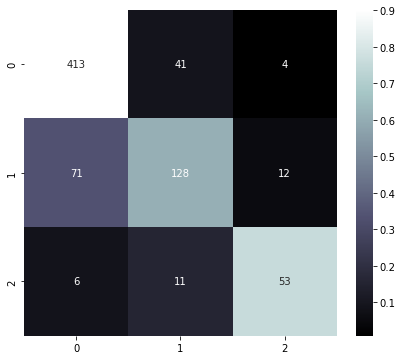

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:21:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:21:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } mi

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:21:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:21:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } mi

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:21:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:21:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } mi

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:21:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:21:20] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:21:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "max_samples", "min_samples_leaf", "min_samples_split" } mi

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

In [171]:
%%time

param = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth"   :[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples":[1000]
          }
FitModel(train[feature_names],train.fault_severity,'XGBoost',xgb.XGBClassifier(n_jobs=-1,objective='softprob'),param,cv=5)

# Balancing the dataset

In [172]:
train.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [174]:
from imblearn.over_sampling import SMOTE

In [175]:
SM = SMOTE(random_state=42)
x_resampled,y_resamples = SM.fit_resample(train[feature_names],train.fault_severity)

In [176]:
x_resampled.shape

(14352, 258)

In [177]:
y_resamples.shape

(14352,)

In [178]:
pd.Series(y_resamples).value_counts()

0    4784
2    4784
1    4784
Name: fault_severity, dtype: int64

Training Dataset Shape : (12916, 258)
Test Dataset Shape : (1436, 258)
Training Label Shape:  (12916,)
Test Label Shape:  (1436,)

Training Started...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[08:36:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:36:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Predicting on Test Set...
[1 0 1 ... 0 0 2]

Best Params : {'n_estimators': 90, 'min_samples_split': 4, 'min_samples_leaf': 17, 'max_features': 'auto', 'max_depth': 10}
Classification Report :               preci

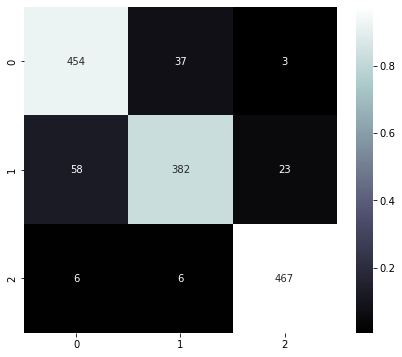

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

[08:32:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:32:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:32:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117899018/work/src/learner.cc:576: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could

/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/arunmac/miniforge3/envs/myenv/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
 

In [180]:
%%time

param = {"n_estimators" : np.arange(10, 100, 10),
           "max_depth"   :[None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           
          }
        
FitModel(x_resampled,y_resamples,'XGBoost',xgb.XGBClassifier(n_jobs=-1,objective='softprob'),param,cv=5)